In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def mean_squared_error(y, y_hat):
    return np.sum((y - y_hat)**2) / len(y)

def polynomial_features(X, degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    new_features = poly_features.fit_transform(X)

    return new_features

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_error, val_error = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_error), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_error), "b-", linewidth=3, label="val")

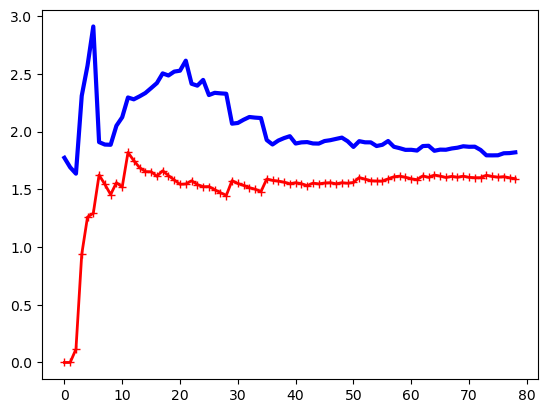

In [9]:
from sklearn.linear_model import LinearRegression

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)
model = LinearRegression()
plot_learning_curve(model, X, y)

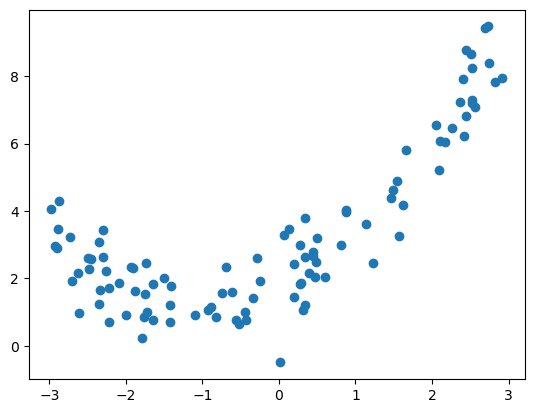

In [10]:
plt.scatter(X, y)